<a href="https://colab.research.google.com/github/nafizahamed8/Artificial-Intelligence-repo/blob/main/Data_preprocessing_of_UCIHAR_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
train_data_path = "/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt"
train_labels_path = "/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt"
test_data_path = "/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt"
test_labels_path = "/content/drive/MyDrive/UCI HAR Dataset/test/y_test.txt"

In [ ]:
X_train = pd.read_csv(train_data_path, header=None, delim_whitespace=True)
y_train = pd.read_csv(train_labels_path, header=None)
X_test = pd.read_csv(test_data_path, header=None, delim_whitespace=True)
y_test = pd.read_csv(test_labels_path, header=None)

<ipython-input-4-f2305daab260>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(train_data_path, header=None, delim_whitespace=True)
<ipython-input-4-f2305daab260>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(test_data_path, header=None, delim_whitespace=True)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train.values.ravel())
y_test = label_encoder.transform(y_test.values.ravel())

In [ ]:
# Concatenate the datasets
X_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((y_train, y_test))

In [ ]:
# Print class names and their encoded values
for i, class_name in enumerate(label_encoder.classes_):
    print(f"Class {i}: {class_name}")

# Create a dictionary mapping original class numbers to activity names
class_mapping = {i + 1: class_name for i, class_name in enumerate(label_encoder.classes_)}
print("\nClass Mapping:")
print(class_mapping)

Class 0: 1
Class 1: 2
Class 2: 3
Class 3: 4
Class 4: 5
Class 5: 6

Class Mapping:
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


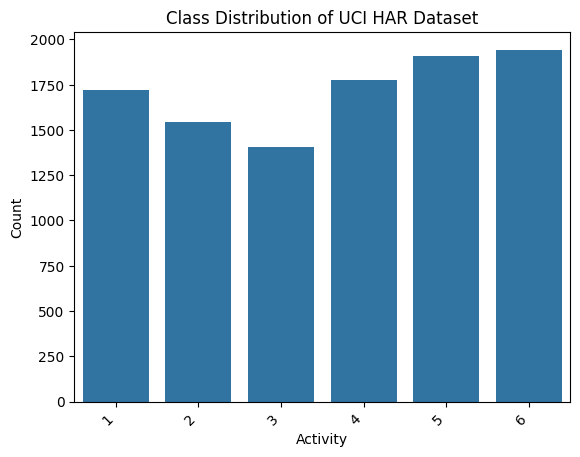

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get class names from LabelEncoder
class_names = label_encoder.classes_

# Create countplot
sns.countplot(x=y_all)
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45, ha='right')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Class Distribution of UCI HAR Dataset')
plt.show()

In [ ]:
import numpy as np


class_counts = np.bincount(y_all)
class_percentages = class_counts / len(y_all) * 100

# Print the percentages
for i, percentage in enumerate(class_percentages):
    print(f"Class {i}: {percentage:.2f}%")

Class 0: 16.72%
Class 1: 14.99%
Class 2: 13.65%
Class 3: 17.25%
Class 4: 18.51%
Class 5: 18.88%


In [ ]:
# --- Data Augmentation Functions ---
def jitter(X, sigma=0.05):
    """Adds random noise to the input data."""
    noise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X + noise

def scaling(X, sigma=0.1):
    """Scales the input data by a random factor."""
    scaling_factor = np.random.normal(loc=1.0, scale=sigma, size=(X.shape[0], 1))
    return X * scaling_factor

def permutation(X, max_segments=5, seg_mode="equal"):
    """Randomly permutes segments within the time series."""
    orig_steps = np.arange(X.shape[2])  # Assuming your data is 3D: (samples, channels, time steps)
    num_segs = np.random.randint(1, max_segments, size=(X.shape[0]))
    ret = np.zeros_like(X)
    for i, pat in enumerate(X):
        if num_segs[i] > 1:
            if seg_mode == "random":
                split_points = np.random.choice(X.shape[2] - 2, num_segs[i] - 1, replace=False)
                split_points.sort()
                splits = np.split(orig_steps, split_points)
            else:
                splits = np.array_split(orig_steps, num_segs[i])
            warp = np.concatenate(np.random.permutation(splits)).ravel()
            ret[i] = pat[0, warp]  # Accessing the channels dimension with index 0
        else:
            ret[i] = pat
    return ret

In [ ]:
X_augmented = jitter(X_all)
X_augmented = scaling(jitter(X_all))

In [ ]:
# Add augmented data to your dataset
X_all = np.concatenate((X_all, X_augmented))
y_all = np.concatenate((y_all, y_all))

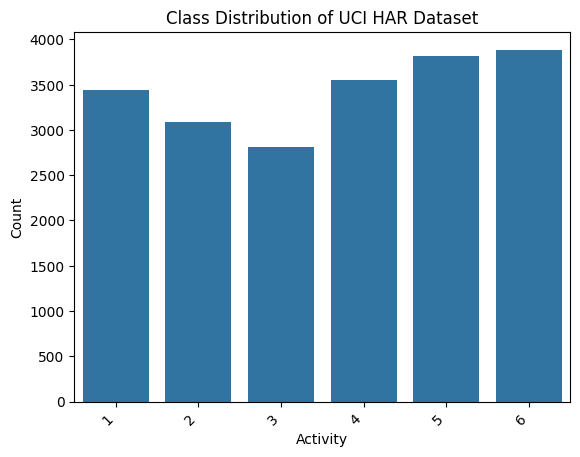

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get class names from LabelEncoder
class_names = label_encoder.classes_

# Create countplot
sns.countplot(x=y_all)
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45, ha='right')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Class Distribution of UCI HAR Dataset')
plt.show()

In [ ]:
import numpy as np

class_counts = np.bincount(y_all)
class_percentages = class_counts / len(y_all) * 100

# Print the percentages
for i, percentage in enumerate(class_percentages):
    print(f"Class {i}: {percentage:.2f}%")

Class 0: 16.72%
Class 1: 14.99%
Class 2: 13.65%
Class 3: 17.25%
Class 4: 18.51%
Class 5: 18.88%


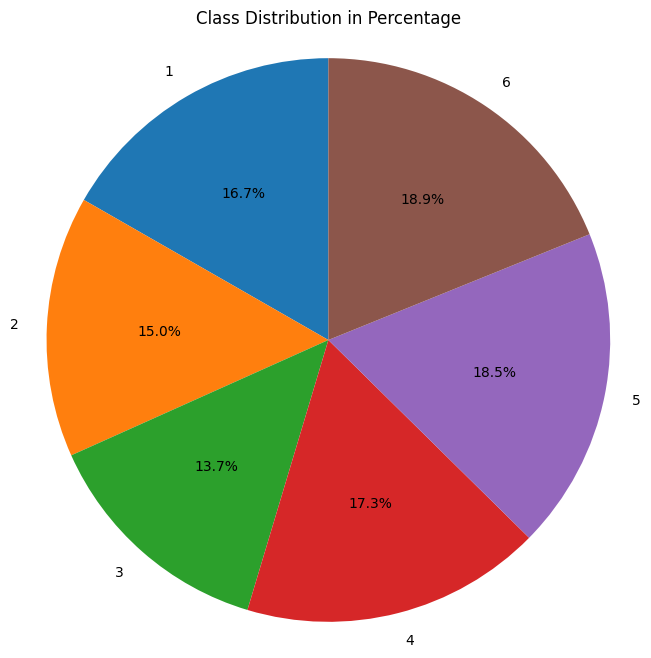

In [ ]:
# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_percentages, labels=class_names, autopct='%1.1f%%', startangle=90)

# Customize the plot
plt.title('Class Distribution in Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

In [ ]:
len(X_all)

20598

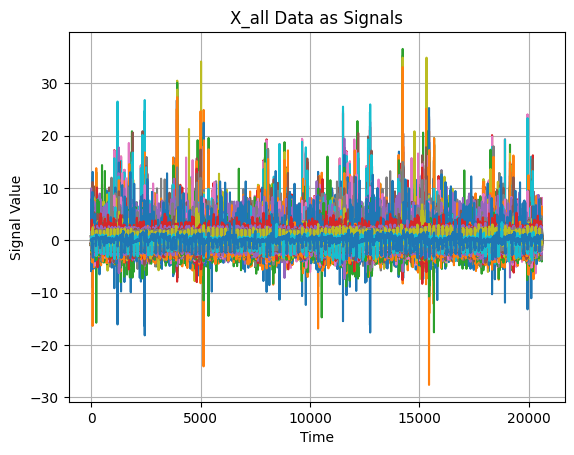

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = X_all.shape[0]
num_features = X_all.shape[1]

# Create a time axis for the signal
time = np.arange(0, num_samples)

# Plot each feature as a separate signal without legend
for i in range(num_features):
    plt.plot(time, X_all[:, i])

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.title('X_all Data as Signals')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Convert to PyTorch tensors
X_all_tensor = torch.tensor(X_all, dtype=torch.float32)
y_all_tensor = torch.tensor(y_all, dtype=torch.long)

In [ ]:
# Split into train, validation, and test sets
X_train_split, X_temp, y_train_split, y_temp = train_test_split(
    X_all_tensor, y_all_tensor, test_size=0.3, random_state=42
)
# %%
X_val_split, X_test_split, y_val_split, y_test_split = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [ ]:
# Create DataLoaders for train, validation, and test sets
train_dataset = TensorDataset(X_train_split, y_train_split)
val_dataset = TensorDataset(X_val_split, y_val_split)
test_dataset = TensorDataset(X_test_split, y_test_split)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
len(train_dataset)

14418

In [ ]:
len(val_dataset)

3090

In [ ]:
len(test_dataset)

3090